In [ ]:
Dimension Reduction

PCA

Explained variance ratio: [0.99809123 0.00173592]


<AxesSubplot:>

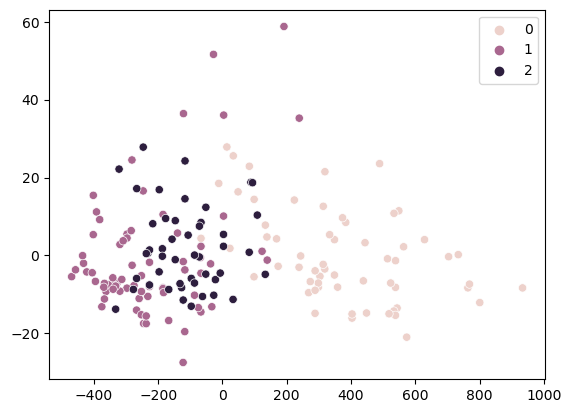

In [169]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns


wine = load_wine()

X = pd.DataFrame(wine.data, columns=wine.feature_names)
# Perform PCA with 2 components
pca = PCA(n_components=2, iterated_power=2000)
X_pca = pca.fit_transform(X)

# Print the explained variance ratio of the two principal components
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot the two principal components
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=wine.target)

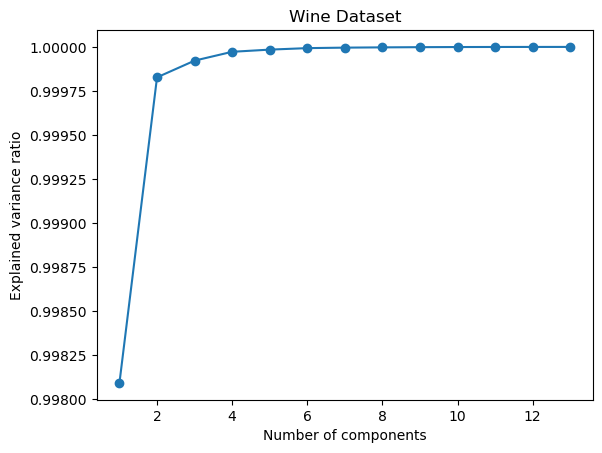

In [136]:
# Compute the explained variance ratio for a range of n_components
import matplotlib.pyplot as plt

n_components_range = range(1, X.shape[1]+1)
explained_variance_ratio = []
for n in n_components_range:
    pca = PCA(n_components=n)
    pca.fit(X)
    explained_variance_ratio.append(sum(pca.explained_variance_ratio_))

# Plot the explained variance ratio as a function of n_components
plt.plot(n_components_range, explained_variance_ratio, 'o-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Wine Dataset')
plt.show()

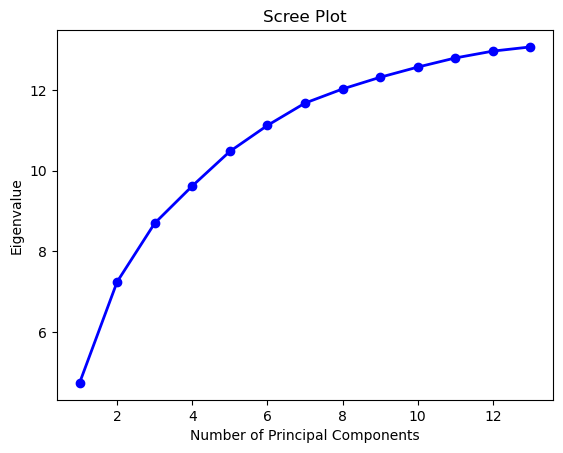

In [142]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the wine dataset
data = load_wine()
X = data.data

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Compute the principal components and their eigenvalues for all values of n
max_n = X.shape[1]
eigenvalues = []
for n in range(1, max_n + 1):
    pca = PCA(n_components=n)
    pca.fit(X_std)
    eigenvalues.append(np.sum(pca.explained_variance_))

# Plot the scree plot
plt.plot(range(1, max_n + 1), eigenvalues, 'bo-', linewidth=2)
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

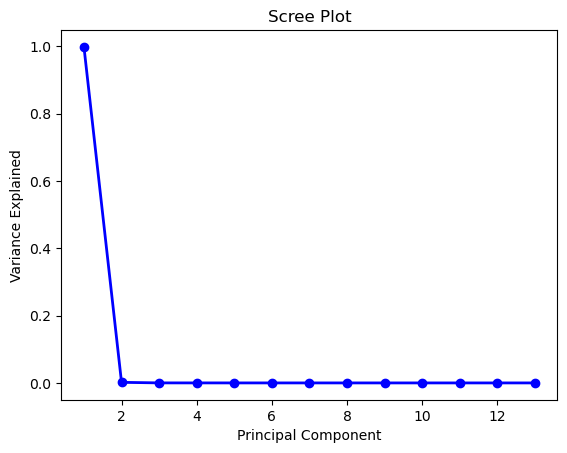

In [144]:
pca = PCA(n_components=13, iterated_power=2000)
X_pca = pca.fit_transform(X)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot - wine')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

d:\miniconda3\envs\ai_env\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
d:\miniconda3\envs\ai_env\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
d:\miniconda3\envs\ai_env\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
d:\miniconda3\envs\ai_env\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


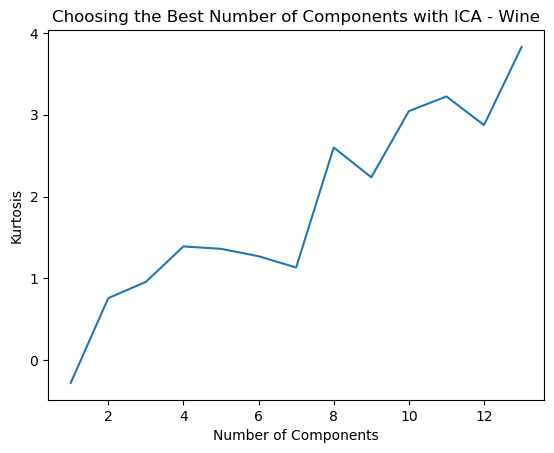

In [148]:
import numpy as np
import pandas as pd
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

# Load the wine dataset
wine = load_wine()

X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Create a FastICA object
ica = FastICA(random_state=0)

# Choose a range of n_components to try
n_components_range = range(1, X.shape[1]+1)

# Calculate kurtosis for each value of n_components
kurtosis_scores = []
for n_components in n_components_range:
    ica.set_params(n_components=n_components)
    X_ica = ica.fit_transform(X)
    kurtosis_scores.append(np.mean(kurtosis(X_ica)))

# Plot the kurtosis scores vs n_components
import matplotlib.pyplot as plt
plt.plot(n_components_range, kurtosis_scores)
plt.xlabel('Number of Components')
plt.ylabel('Kurtosis')
plt.title('Choosing the Best Number of Components with ICA - Wine')
plt.show()

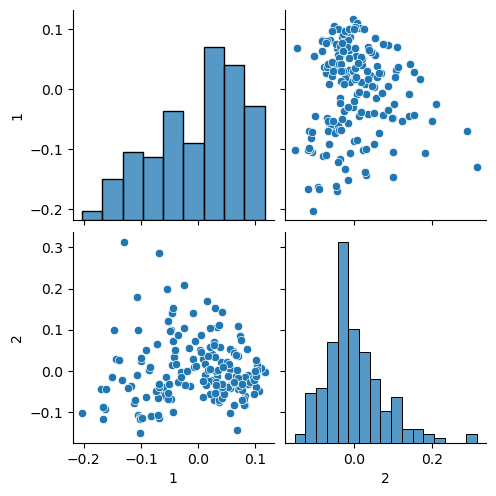

In [163]:
import numpy as np
import pandas as pd
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# Load the wine dataset
wine = load_wine()

X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Create a FastICA object with the best n_components value
ica = FastICA(n_components=2, random_state=0)
X_ica = ica.fit_transform(X)

# Visualize the independ
df = pd.DataFrame(X_ica, columns=['1','2'])
sns.pairplot(df)

In [164]:
print('Mean of each component:', X_ica.mean(axis=0))
print('Variance of each component:', X_ica.var(axis=0))
print('Correlation with original features:', pd.DataFrame(X_ica).corrwith(X))

Mean of each component: [7.4846496e-18 1.8711624e-18]
Variance of each component: [0.00561798 0.00561798]
Correlation with original features: 0                              NaN
1                              NaN
alcalinity_of_ash              NaN
alcohol                        NaN
ash                            NaN
color_intensity                NaN
flavanoids                     NaN
hue                            NaN
magnesium                      NaN
malic_acid                     NaN
nonflavanoid_phenols           NaN
od280/od315_of_diluted_wines   NaN
proanthocyanins                NaN
proline                        NaN
total_phenols                  NaN
dtype: float64


In [165]:
import numpy as np
from sklearn.feature_selection import f_classif

# Perform feature selection to identify the most informative components
F, pval = f_classif(X_ica, y)
informative_components = np.argsort(F)[::-1][:2]

# Select the informative components
X_ica_selected = X_ica[:, informative_components]

Loading coefficients of component 1: alcohol                        -2.145889e-06
malic_acid                     -3.000161e-06
ash                            -6.775184e-06
alcalinity_of_ash              -3.767485e-05
magnesium                      -1.468262e-03
total_phenols                  -1.514648e-06
flavanoids                     -2.855932e-07
nonflavanoid_phenols            2.012843e-06
proanthocyanins                -7.470504e-06
color_intensity                -2.266039e-05
hue                             1.077857e-06
od280/od315_of_diluted_wines    4.958438e-06
proline                        -2.046100e-04
Name: 0, dtype: float64
Loading coefficients of component 2: alcohol                         6.555398e-06
malic_acid                      1.196214e-05
ash                             2.539863e-05
alcalinity_of_ash               1.465988e-04
magnesium                       5.526896e-03
total_phenols                   4.796070e-06
flavanoids                     -3.825808e-07
no

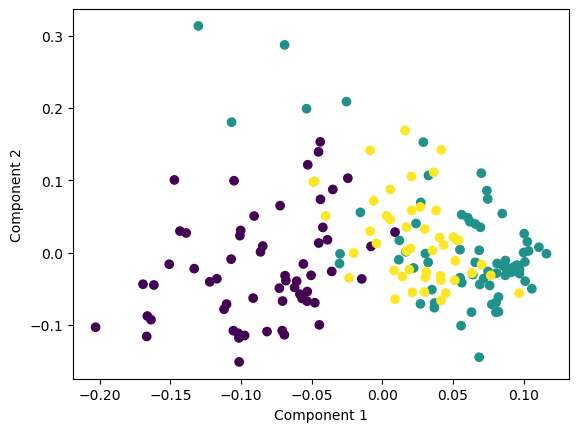

In [167]:
import matplotlib.pyplot as plt

# Examine the loading coefficients of the informative components
loadings = pd.DataFrame(ica.components_, columns=wine.feature_names)
print('Loading coefficients of component 1:', loadings.loc[informative_components[0]])
print('Loading coefficients of component 2:', loadings.loc[informative_components[1]])

# Visualize the distribution of the informative components
plt.scatter(X_ica_selected[:, 0], X_ica_selected[:, 1], c=y)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

Randomized Projections

In [10]:
from sklearn.datasets import load_wine
from sklearn import random_projection
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler

X = load_wine().data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply Randomized Projections with n_components = 5
rp = GaussianRandomProjection(n_components=5)
X_rp = rp.fit_transform(X)

# Print the shape of the transformed dataset
print("Original shape: ", X.shape)
print("Transformed shape: ", X_rp.shape)

Original shape:  (178, 13)
Transformed shape:  (178, 5)


d:\miniconda3\envs\ai_env\lib\site-packages\sklearn\random_projection.py:381: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (13 < 14).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning,


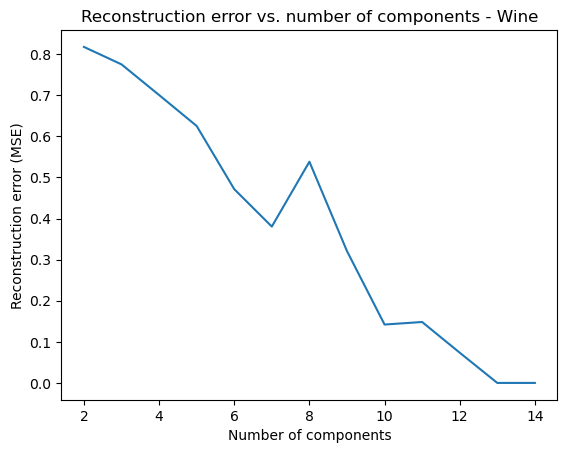

In [124]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X = load_wine().data
scaler = StandardScaler()
X = scaler.fit_transform(X)
n_components_range = range(2, 15)
reconstruction_errors = []

for n in n_components_range:
    grp = GaussianRandomProjection(n_components=n)
    X_proj = grp.fit_transform(X)
    P = grp.components_
    X_recon = np.linalg.pinv(P).dot(X_proj.T).T
    mse = mean_squared_error(X, X_recon)
    reconstruction_errors.append(mse)

plt.plot(n_components_range, reconstruction_errors)
plt.xlabel('Number of components')
plt.ylabel('Reconstruction error (MSE)')
plt.title('Reconstruction error vs. number of components - Wine')
plt.show()

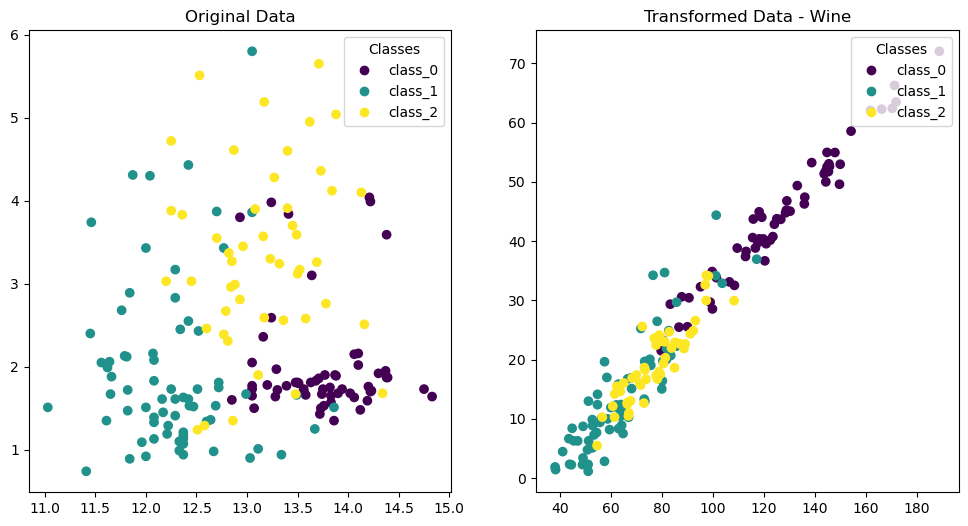

In [190]:
n_components = 5
grp = GaussianRandomProjection(n_components=n_components, random_state=42)
X_transformed = grp.fit_transform(X)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# scatter plot of the original dataset
scatter1 = ax1.scatter(wine.data[:, 0], wine.data[:, 1], c=wine.target)
ax1.set_title('Original Data')

# scatter plot of the transformed dataset
scatter2 = ax2.scatter(X_transformed[:, 0], X_transformed[:, 1], c=wine.target)
ax2.set_title('Transformed Data - Wine')

# add legend
handles, labels = scatter1.legend_elements()
ax1.legend(handles, wine.target_names, loc="upper right", title="Classes")
handles, labels = scatter2.legend_elements()
ax2.legend(handles, wine.target_names, loc="upper right", title="Classes")

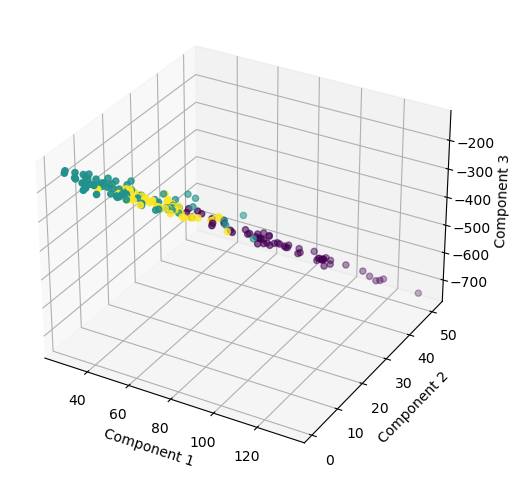

In [178]:
#Plot the clusters in the projected space
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=wine.target, cmap='viridis')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

RFECV

d:\miniconda3\envs\ai_env\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
d:\miniconda3\envs\ai_env\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
d:\miniconda3\envs\ai_env\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
d:\miniconda3\envs\ai_env\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.wa

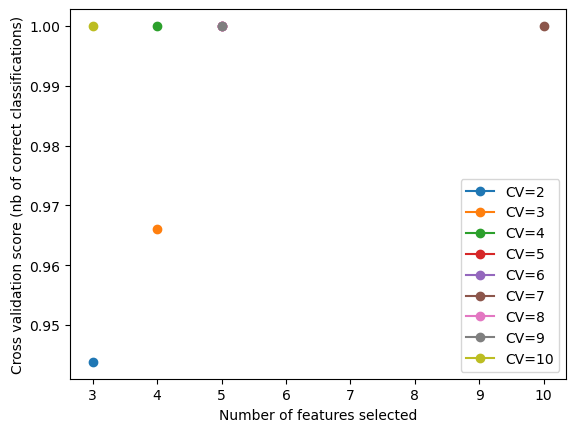

Optimal number of features (CV=2): 3
Optimal number of features (CV=3): 4
Optimal number of features (CV=4): 4
Optimal number of features (CV=5): 5
Optimal number of features (CV=6): 5
Optimal number of features (CV=7): 10
Optimal number of features (CV=8): 5
Optimal number of features (CV=9): 5
Optimal number of features (CV=10): 3


In [32]:
from sklearn.datasets import load_wine
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load the wine dataset
data = load_wine()
X = data.data
y = data.target

# Define a range of cv values to test
cv_range = np.arange(2, 11)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Store the number of features selected for each cv value
n_features_list = []

# Store the cross-validation scores for each cv value
cv_scores_list = []

# Loop over the range of cv values
for cv in cv_range:
    # Create an RFECV object with the current cv value
    rfecv = RFECV(estimator=clf, step=1, cv=cv)

    # Fit the RFECV object to the dataset
    rfecv.fit(X, y)

    # Store the number of features selected and the cv score
    n_features_list.append(rfecv.n_features_)
    cv_scores_list.append(rfecv.grid_scores_.max())

# Plot the number of features vs. cross-validation scores for each cv value
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
for i in range(len(cv_range)):
    plt.plot(n_features_list[i], cv_scores_list[i], 'o-', label="CV=%d" % cv_range[i])
plt.legend()
plt.show()

# Print the optimal number of features for each cv value
for i in range(len(cv_range)):
    print("Optimal number of features (CV=%d): %d" % (cv_range[i], n_features_list[i]))


d:\miniconda3\envs\ai_env\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


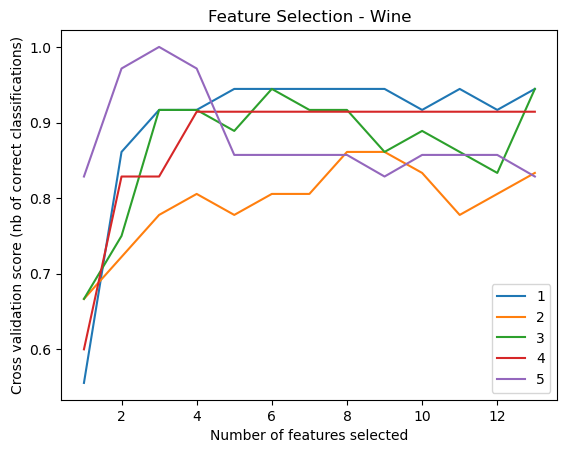

Optimal number of features: 4


In [125]:
from sklearn.datasets import load_wine
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load the wine dataset
data = load_wine()
X = data.data
y = data.target

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Create an RFECV object
rfecv = RFECV(estimator=clf, step=1, cv=5)

# Fit the RFECV object to the dataset
rfecv.fit(X, y)

# Plot the number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.legend(['1','2','3','4','5'])
plt.title('Feature Selection - Wine')
plt.show()

# Print the optimal number of features
print("Optimal number of features: %d" % rfecv.n_features_)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


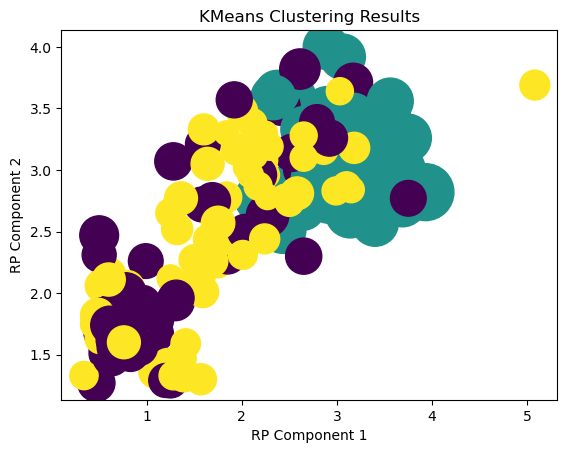

In [186]:
from sklearn.datasets import load_wine
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

# Load the wine dataset
data = load_wine()
X = data.data
y = data.target

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Create an RFECV object
rfecv = RFECV(estimator=clf, step=1, cv=5)

# Fit the RFECV object to the dataset
rfecv.fit(X, y)

# Select the optimal number of features
X_reduced = X[:, rfecv.support_]

# Apply KMeans clustering to the reduced dataset
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_reduced)

# Print the cluster labels
print(kmeans.labels_)


plt.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels)
plt.xlabel('RP Component 1')
plt.ylabel('RP Component 2')
plt.title('KMeans Clustering Results')
plt.show()

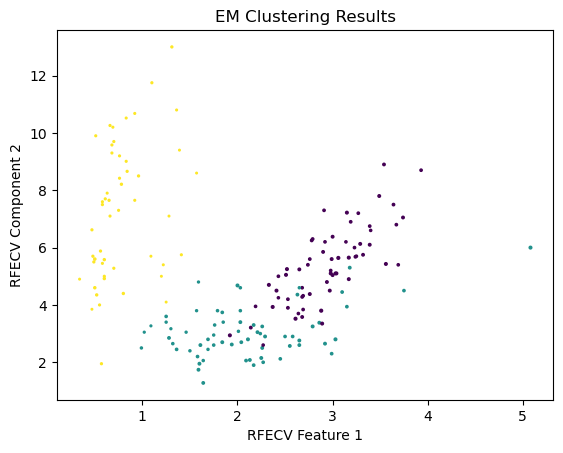

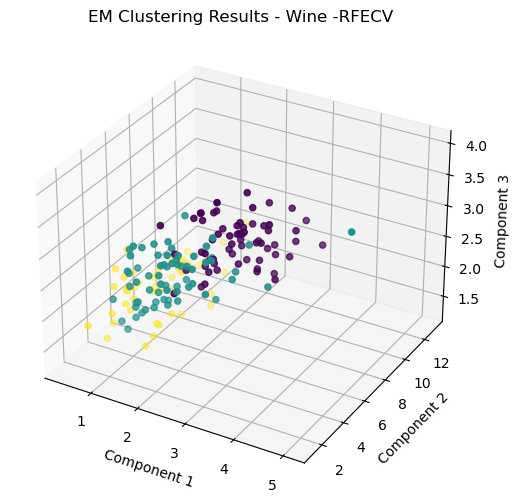

In [185]:
from sklearn.mixture import GaussianMixture
gmm_rp = GaussianMixture(n_components=3, random_state=2742)
gmm_rp.fit(X_reduced)

clusters = gmm_rp.predict(X_reduced)

# silhouette_avg = silhouette_score(X_reduced, clusters)

# Visualize the clustering results
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=clusters)
plt.xlabel('RFECV Feature 1')
plt.ylabel('RFECV Component 2')
plt.title('EM Clustering Results')
plt.show()

#Plot the clusters in the projected space
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=clusters, cmap='viridis')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('EM Clustering Results - Wine -RFECV')
plt.show()

section 3 - applying the algos to knn and gmm

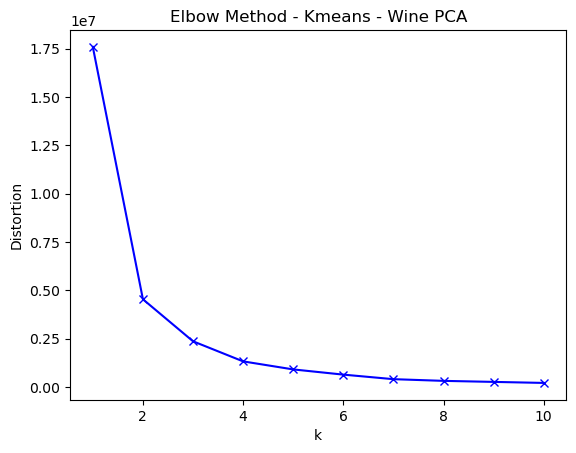

In [126]:
#knn pca

distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method - Kmeans - Wine PCA')
plt.show()

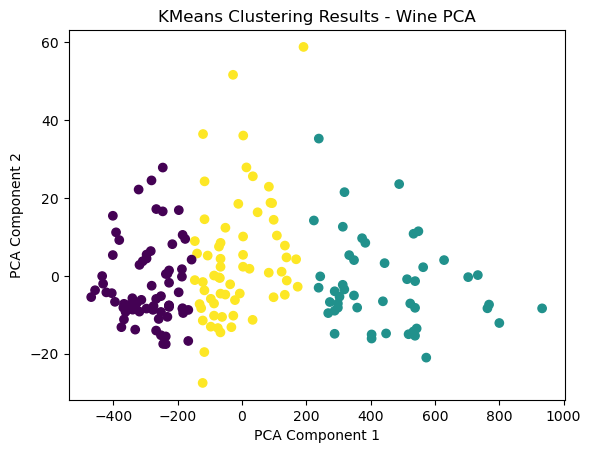

In [191]:
#optimal k value is 2
kmeans = KMeans(n_clusters=3, random_state=1714)
labels = kmeans.fit_predict(X_pca)

# Visualize the clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering Results - Wine PCA')
plt.show()

In [192]:
from sklearn.metrics import silhouette_score, v_measure_score

labels = kmeans.labels_
s_score = silhouette_score(X_pca, labels)
print("Silhouette score:",s_score)

Silhouette score: 0.5722554756855063


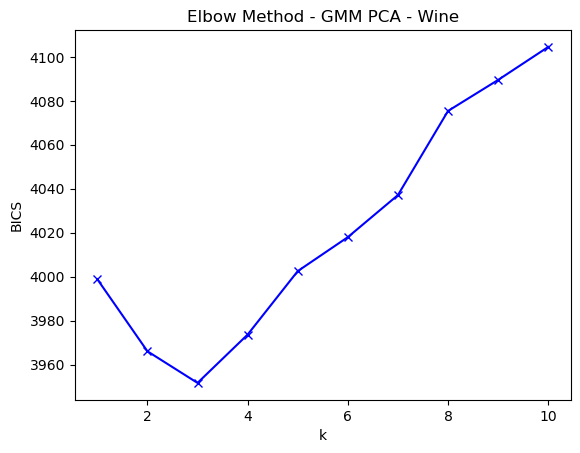

Best n_components: 3


In [128]:
#gmm PCA
n_components_range = range(1, 11)

# Fit GMM for each value of n_components and compute BIC
bics = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_pca)
    bics.append(gmm.bic(X_pca))



# Plot the elbow curve
plt.plot(n_components_range, bics, 'bx-')
plt.xlabel('k')
plt.ylabel('BICS')
plt.title('Elbow Method - GMM PCA - Wine')
plt.show()

# Find the best value of n_components
best_n_components = n_components_range[np.argmin(bics)]
print(f"Best n_components: {best_n_components}")

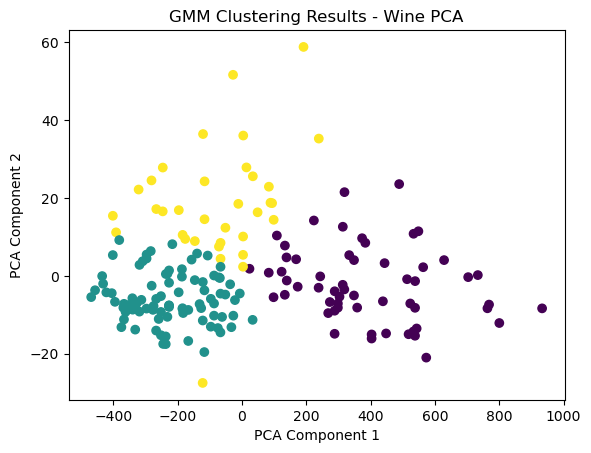

0.262333307994989


In [129]:
#gmm PCA
#best n_components = 3
gmm_pca = GaussianMixture(n_components=3, random_state=2742)
gmm_pca.fit(X_pca)

clusters_gmm = gmm_pca.predict(X_pca)

silhouette_avg = silhouette_score(X_pca, clusters_gmm)

# Visualize the clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_gmm)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Clustering Results - Wine PCA')
plt.show()

print(silhouette_avg)

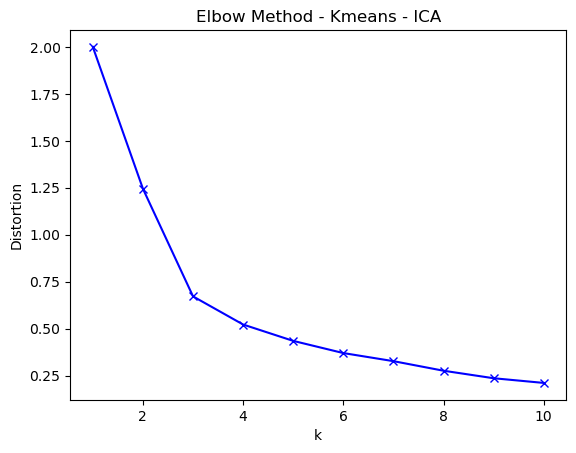

In [150]:
#ica kmeans
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_ica)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method - Kmeans - ICA')
plt.show()

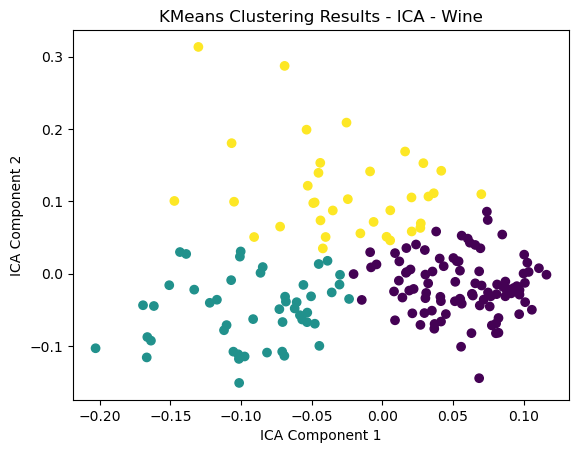

In [193]:
#optimal k-value = 3
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_ica)

# Visualize the clustering results
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=labels)
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.title('KMeans Clustering Results - ICA - Wine')
plt.show()


In [195]:
from sklearn.metrics import silhouette_score, v_measure_score

labels = kmeans.labels_
s_score = silhouette_score(X_ica, labels)
print("Silhouette score:",s_score)

Silhouette score: 0.4756377831044309


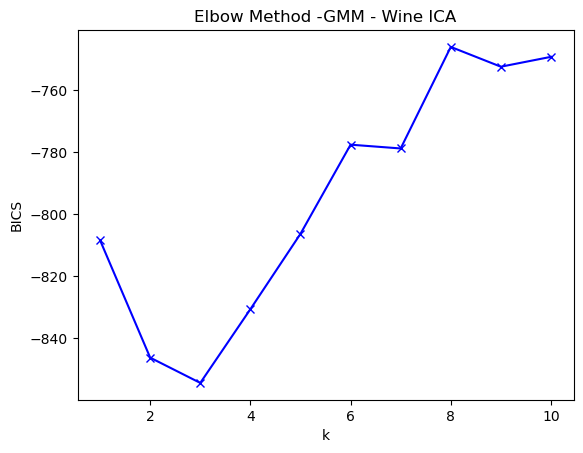

Best n_components: 3


In [156]:
#gmm ICA
n_components_range = range(1, 11)

# Fit GMM for each value of n_components and compute BIC
bics = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_ica)
    bics.append(gmm.bic(X_ica))



# Plot the elbow curve
plt.plot(n_components_range, bics, 'bx-')
plt.xlabel('k')
plt.ylabel('BICS')
plt.title('Elbow Method -GMM - Wine ICA')
plt.show()

# Find the best value of n_components
best_n_components = n_components_range[np.argmin(bics)]
print(f"Best n_components: {best_n_components}")

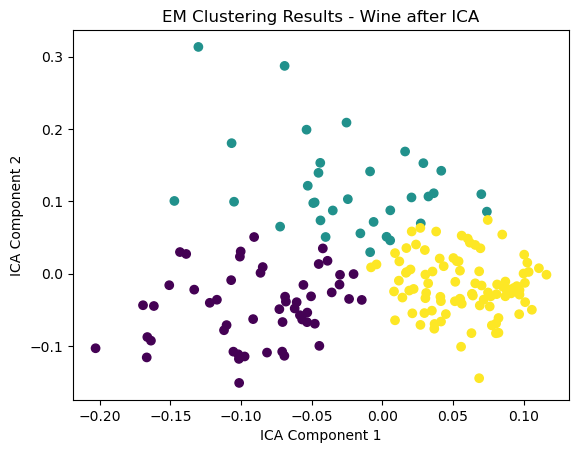

In [196]:
#gmm ICA optimal n_components = 3

from sklearn.mixture import GaussianMixture

wine = load_wine()

X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Create a FastICA object with the best n_components value
ica = FastICA(n_components=2, random_state=0)
X_ica = ica.fit_transform(X)

gmm_ICA = GaussianMixture(n_components=3, random_state=2742)
gmm_ICA.fit(X_ica)

clusters = gmm_ICA.predict(X_ica)


# Visualize the clustering results
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=clusters)
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.title('EM Clustering Results - Wine after ICA')
plt.show()

In [197]:
from sklearn.metrics import silhouette_score, v_measure_score

labels = kmeans.labels_
s_score = silhouette_score(X_ica, clusters)
print("Silhouette score:",s_score)

Silhouette score: 0.4703625042575184


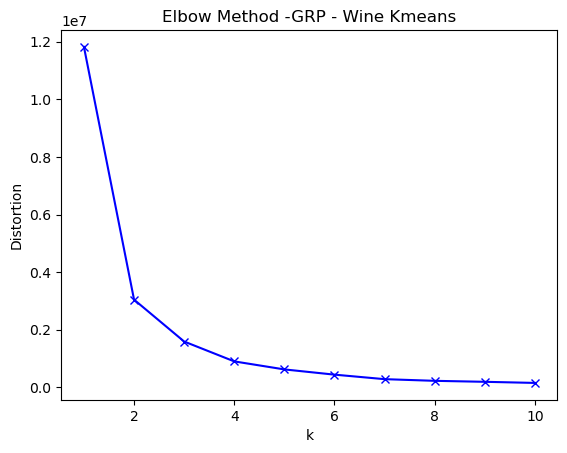

In [179]:
data = load_wine()
X = data.data

# Apply Randomized Projections with n_components = 5
rp = GaussianRandomProjection(n_components=5)
X_rp = rp.fit_transform(X)
# labels = kmeans.fit_predict(X_rp)

distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_rp)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method -GRP - Wine Kmeans')
plt.show()

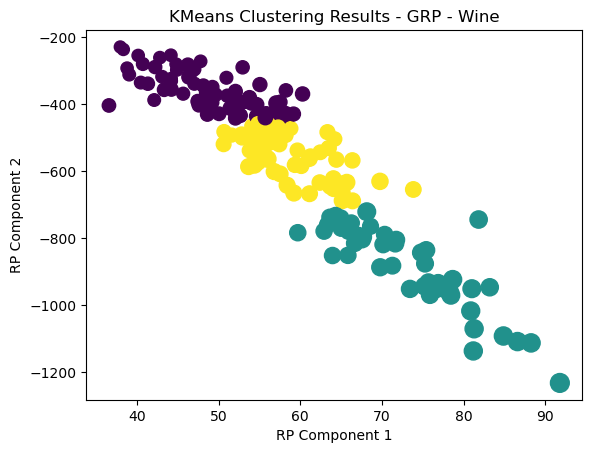

In [199]:
rp = GaussianRandomProjection(n_components=5)
X_rp = rp.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_rp)

# Visualize the clustering results
plt.scatter(X_rp[:, 0], X_rp[:, 1], X_rp[:, 2], c=labels)
plt.xlabel('RP Component 1')
plt.ylabel('RP Component 2')
plt.title('KMeans Clustering Results - GRP - Wine')
plt.show()

In [200]:
from sklearn.metrics import silhouette_score, v_measure_score

labels = kmeans.labels_
s_score = silhouette_score(X_rp, labels)
print("Silhouette score:",s_score)

Silhouette score: 0.5742226221064668


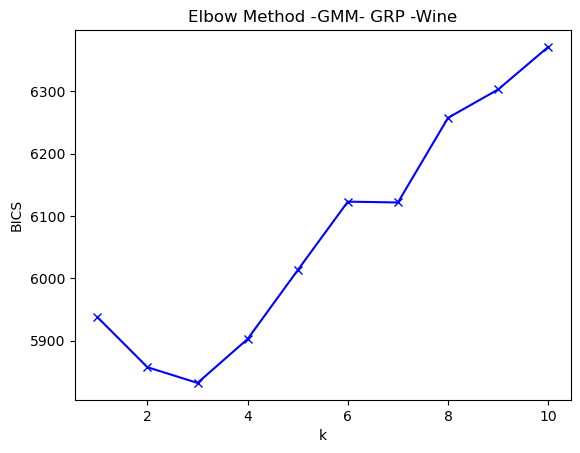

Best n_components: 3


In [182]:
#gmm RP
n_components_range = range(1, 11)
rp = GaussianRandomProjection(n_components=5)
X_rp = rp.fit_transform(X)

# Fit GMM for each value of n_components and compute BIC
bics = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_rp)
    bics.append(gmm.bic(X_rp))



# Plot the elbow curve
plt.plot(n_components_range, bics, 'bx-')
plt.xlabel('k')
plt.ylabel('BICS')
plt.title('Elbow Method -GMM- GRP -Wine')
plt.show()

# Find the best value of n_components
best_n_components = n_components_range[np.argmin(bics)]
print(f"Best n_components: {best_n_components}")

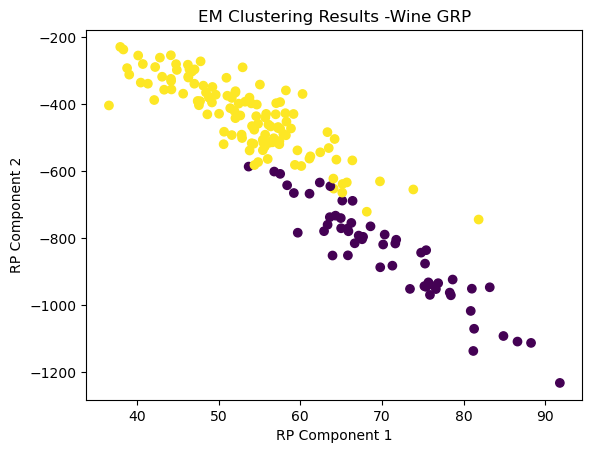

In [201]:
#best n_components = 2
gmm_rp = GaussianMixture(n_components=2, random_state=2742)
gmm_rp.fit(X_rp)

clusters = gmm_rp.predict(X_rp)

silhouette_avg = silhouette_score(X_rp, clusters)

# Visualize the clustering results
plt.scatter(X_rp[:, 0], X_rp[:, 1], c=clusters)
plt.xlabel('RP Component 1')
plt.ylabel('RP Component 2')
plt.title('EM Clustering Results -Wine GRP')
plt.show()

In [202]:
from sklearn.metrics import silhouette_score, v_measure_score

labels = kmeans.labels_
s_score = silhouette_score(X_rp, clusters)
print("Silhouette score:",s_score)

Silhouette score: 0.6144761440765945


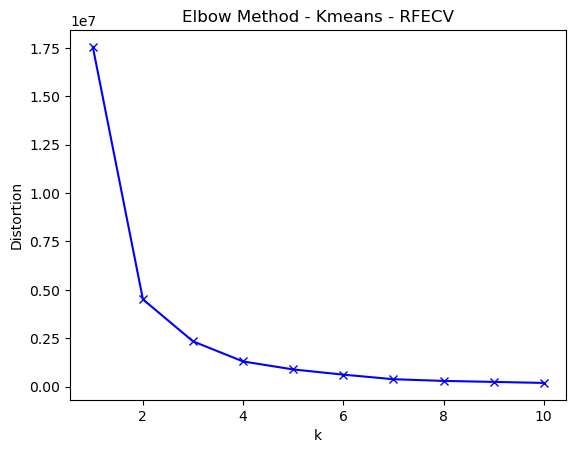

In [189]:
#kmeans rfecv

data = load_wine()
X = data.data
y = data.target

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Create an RFECV object
rfecv = RFECV(estimator=clf, step=1, cv=5)

# Fit the RFECV object to the dataset
rfecv.fit(X, y)

# Select the optimal number of features
X_reduced = X[:, rfecv.support_]

distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_reduced)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method - Kmeans - RFECV')
plt.show()

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


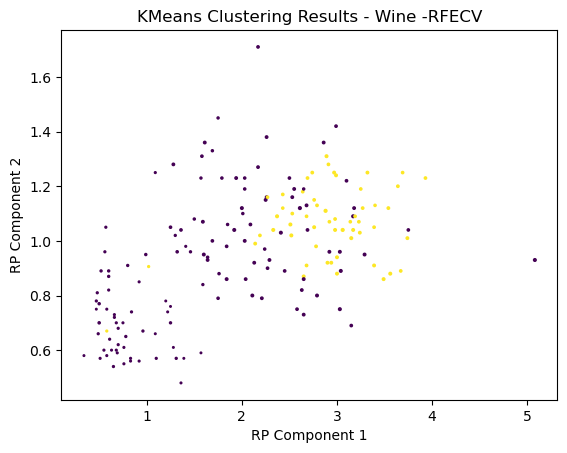

In [203]:
#best n_clusters = 2

kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X_reduced)

# Print the cluster labels
print(kmeans.labels_)


plt.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels)
plt.xlabel('RP Component 1')
plt.ylabel('RP Component 2')
plt.title('KMeans Clustering Results - Wine -RFECV')
plt.show()

In [204]:
from sklearn.metrics import silhouette_score, v_measure_score

labels = kmeans.labels_
s_score = silhouette_score(X_reduced, labels)
print("Silhouette score:",s_score)

Silhouette score: 0.6605272647510033


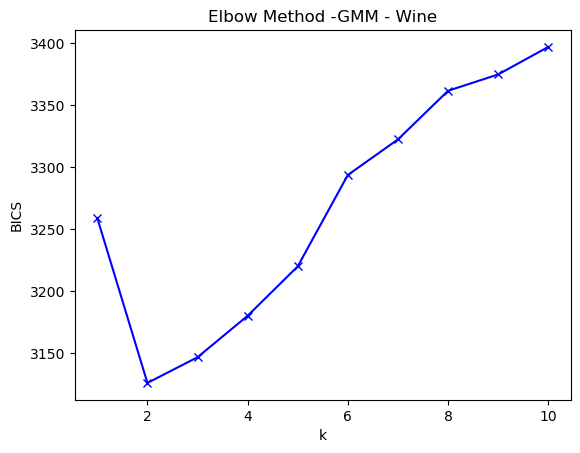

Best n_components: 2


In [187]:
#gmm rfecv

# Fit GMM for each value of n_components and compute BIC
bics = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_reduced)
    bics.append(gmm.bic(X_reduced))



# Plot the elbow curve
plt.plot(n_components_range, bics, 'bx-')
plt.xlabel('k')
plt.ylabel('BICS')
plt.title('Elbow Method -GMM - Wine')
plt.show()

# Find the best value of n_components
best_n_components = n_components_range[np.argmin(bics)]
print(f"Best n_components: {best_n_components}")

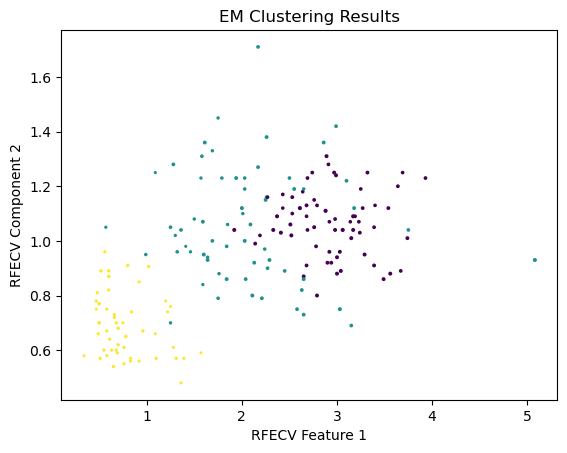

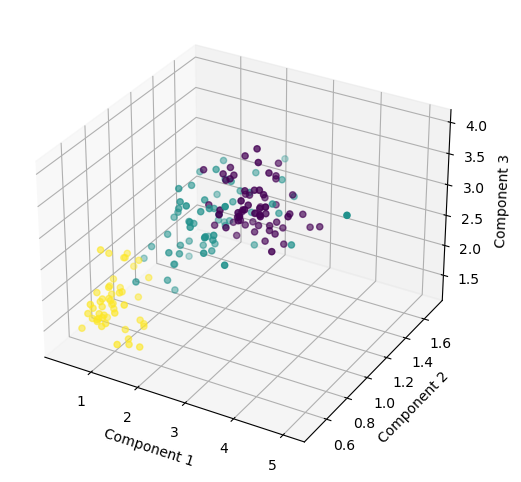

In [205]:
#best n_components = 3

gmm_rp = GaussianMixture(n_components=3, random_state=2742)
gmm_rp.fit(X_reduced)

clusters = gmm_rp.predict(X_reduced)

# silhouette_avg = silhouette_score(X_reduced, clusters)

# Visualize the clustering results
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=clusters)
plt.xlabel('RFECV Feature 1')
plt.ylabel('RFECV Component 2')
plt.title('EM Clustering Results')
plt.show()

#Plot the clusters in the projected space
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=clusters, cmap='viridis')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

In [206]:
from sklearn.metrics import silhouette_score, v_measure_score

labels = kmeans.labels_
s_score = silhouette_score(X_reduced, clusters)
print("Silhouette score:",s_score)

Silhouette score: 0.2258280171900529
